In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0,'..')


from food.paths import *
from food.search import *
from mytools.tools import *
import pandas as pd
from pathlib import Path
import numpy as np
from IPython.display import clear_output

photos_path = test_path/'test_photos'

dev


/home/dima/mytools/mytools/visual.py:26: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  series2tensor = lambda series:torch.tensor([np.array(c) for c in series.values])


In [2]:
from segmentor.segment import get_segment_model

In [3]:
df = pd.read_csv(test_path/'test_set.csv')
df.columns = ['name','fat','protein','carb','energy','','','','','','composition','path']
df = df[[c for c in df.columns if c!='']]

df['path'] = df['path'].apply(lambda n:photos_path/f'{n}.jpeg')

for c in ['fat','protein','carb','energy']:
    df[c] = pd.to_numeric(df[c].str.replace(',','.'))

In [4]:
test_path.ls()

[PosixPath('/home/dima/data/datasets/mnogolasosya/test_photos'),
 PosixPath('/home/dima/data/datasets/mnogolasosya/test_set.csv')]

In [16]:
corrupted_items = [4]
df = df[~df.index.isin(corrupted_items)]

In [47]:
df = df.sample(frac=1).reset_index(drop = True)

In [48]:
model_path = checkpoints_path.ls()[0]
segment_model = get_segment_model(model_path,device = 'cuda:2')

/home/dima/segmentator/mmseg/models/builder.py:59: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(


load pre-trained weight from imagenet21k


In [49]:
paths = reference_images_path.ls()

In [75]:
preds_ = []

for i in df.index[:10]:
    clear_output()
    print(i)

    s = df.loc[i]
    img,clip_df,masks,stats = search(segment_model=segment_model,path=s['path'],prompt_factor=0.1,exand_times =2)
    pred = stats.T[['energy','protein','carb','fat']]
    pred.index = [i]
    preds_.append(pred)


preds = pd.concat(preds_)
preds.columns = [c+'_pred' for c in preds.columns]
preds = df.join(preds).dropna()
(preds['energy']/preds['energy_pred']-1).abs().mean()
preds['error'] = (preds['energy']/preds['energy_pred']-1)
# preds = preds.set_index('name')
preds['error_abs'] = preds['error'].abs()


9


/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


In [76]:
preds = preds.sort_values('error_abs')

In [77]:
preds

,name,fat,protein,carb,energy,composition,path,energy_pred,protein_pred,carb_pred,fat_pred,error,error_abs
0,Ролл Сумасшедший Дракон,5.80,8.19,28.04,196.88,"Состав: Рис, заправка для риса, филе угря, сыр...",/home/dima/data/datasets/mnogolasosya/test_pho...,205.694366,3.131081,31.840218,7.377543,-0.042852,0.042852
7,"Сэндвич Ролл с ветчиной, омлетом и моцареллой",14.09,10.50,12.94,220.22,"Состав: Скрэмбл (сливки, масло подсолнечное, я...",/home/dima/data/datasets/mnogolasosya/test_pho...,207.395218,12.711282,14.817193,10.864491,0.061837,0.061837
2,Ролл Креветка Спайси,5.60,9.48,26.79,195.40,"Состав: рис, креветки, соус спайси, огурец све...",/home/dima/data/datasets/mnogolasosya/test_pho...,210.457962,2.893473,20.921402,12.921487,-0.071549,0.071549
4,Поке с лососем и томатами,2.10,2.41,21.09,112.90,"Состав: Филе лосося, огурец, кунжут белый жаре...",/home/dima/data/datasets/mnogolasosya/test_pho...,102.029472,12.629086,4.079488,4.114116,0.106543,0.106543
6,Япо-тако с лососем,8.98,2.09,18.12,161.67,"Состав: рис, заправка для риса, филе лосося, о...",/home/dima/data/datasets/mnogolasosya/test_pho...,133.224533,8.049200,21.031580,1.797410,0.213515,0.213515
5,Сет Литл,4.22,3.68,24.48,150.57,"Ролл Канада (8 шт.), ролл Супер-Филадельфия с ...",/home/dima/data/datasets/mnogolasosya/test_pho...,114.098015,8.975908,19.090734,1.932305,0.319655,0.319655
8,Ролл Снежная калифорния,7.08,8.98,45.93,283.30,"Состав:Рис,вода,сахар,соль,уксус мицукан(спирт...",/home/dima/data/datasets/mnogolasosya/test_pho...,212.755737,19.797451,17.693201,6.481689,0.331574,0.331574
1,Мисо-суп классический,1.06,1.62,2.62,26.49,"Состав: Вода, соевая паста Акамисо темная, вод...",/home/dima/data/datasets/mnogolasosya/test_pho...,52.176704,3.996630,6.924839,1.880864,-0.492302,0.492302
9,Сет Бэрри,5.58,5.47,25.40,173.68,"Ролл Калифорникейшн с лососем (8 шт.), ролл Су...",/home/dima/data/datasets/mnogolasosya/test_pho...,100.337440,3.197416,18.637978,1.280998,0.730959,0.730959
3,Классический завтрак,12.55,8.72,9.47,185.68,"Состав: Яичница (яйцо, масло подсолнечное, сол...",/home/dima/data/datasets/mnogolasosya/test_pho...,102.474358,8.258239,12.548276,2.872724,0.811965,0.811965


In [78]:
preds['error_abs'].mean()

0.3182751488668356

In [79]:
from PIL import Image

In [85]:
p = preds['path'].iloc[0]

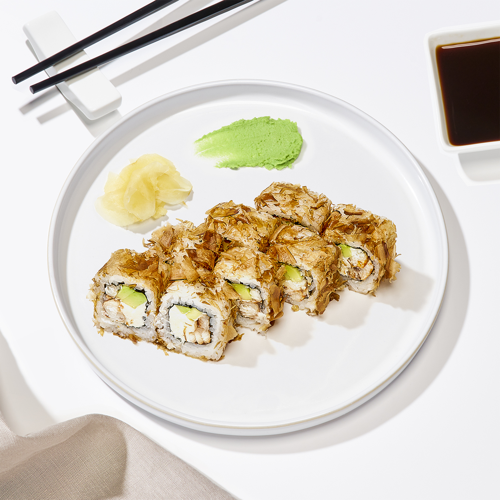

In [86]:
Image.open(p).resize((500,500))

In [87]:
img,clip_df,masks,stats = search(segment_model=segment_model,path=p,prompt_factor=0.5,exand_times =2)

/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(


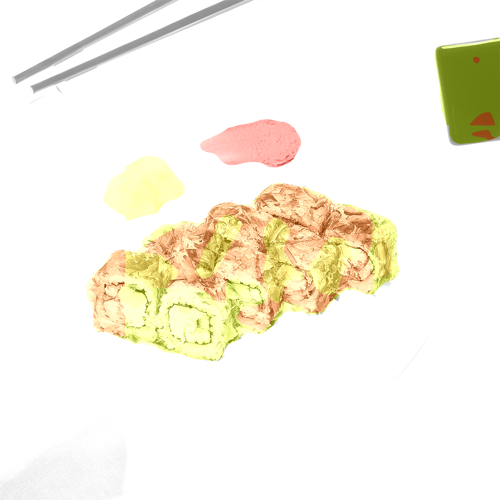

In [88]:
img.resize((500,500))

In [89]:
clip_df

,clip,text,version,description,category,energy,protein,carb,fat,score,classes,area
id,,,,,,,,,,,,
1100833,"[0.0071105165, 0.00042199926, 0.012195292, 0.0...","the photo of ""Roll, gluten free"" dish, which ...",1,"Roll, gluten free",Rolls and buns,239.0,3.34,50.47,2.65,0.282192,63,150427
1102346,"[0.014651228, 0.009880561, -0.027901908, 0.004...","""Sushi roll, California"" made of Rice, white, ...",2,"Sushi roll, California","Egg rolls, dumplings, sushi",93.0,2.92,18.41,0.67,0.293598,69,94311
1098814,"[0.021673132, 0.004410617, -0.0025815098, 0.04...","the photo of ""Cod, coated, fried, made with c...",1,"Cod, coated, fried, made with cooking spray",Fish,151.0,18.81,11.64,2.62,0.257244,55,63958
1103921,"[0.038697343, 0.043709937, -0.0029044843, 0.03...","the photo of ""Soy based sauce, for use with v...",1,"Soy based sauce, for use with vegetables",Not included in a food category,87.0,1.65,20.07,0.15,0.275946,53,48596
1103692,"[0.011130724, 0.021702651, -0.009329101, 0.028...","the photo of ""Wasabi paste"" dish, which is ma...",1,Wasabi paste,Mustard and other condiments,292.0,2.23,46.13,10.90,0.307539,90,30625
1098463,"[-0.0068576015, 0.04232666, -0.010274797, 0.02...","the photo of ""Chicken breast, fried, coated, ...",1,"Chicken breast, fried, coated, skin / coating ...","Chicken, whole pieces",176.0,29.62,0.00,5.45,0.264816,71,30406
1100833,"[0.0071105165, 0.00042199926, 0.012195292, 0.0...","the photo of ""Roll, gluten free"" dish, which ...",1,"Roll, gluten free",Rolls and buns,239.0,3.34,50.47,2.65,0.259255,14,3613


In [31]:
preds['error_abs'].mean()

0.5088096017322538

In [44]:
preds['error_abs'].mean()

0.39726202240431696

In [25]:
preds = preds['error_abs'].mean()preds.sort_values("error_abs")

In [26]:
preds.tail()

,name,fat,protein,carb,energy,composition,url,energy_pred,protein_pred,carb_pred,fat_pred,error,error_abs
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,169.478958,5.797573,24.453396,5.364585,0.467793,0.467793
9,Поке с лососем,3.27,1.82,7.42,66.41,"Основа на выбор: рис, киноа или салат. \nСоста...",https://dima.skynet.center/test_photos/f1b31a2...,136.924286,9.781154,17.116989,5.646695,-0.514987,0.514987
6,Мусс из свежего манго с сырно-кокосовым кремом,10.20,1.95,14.03,155.72,"Состав: пюре манго, сырно-кокосовый крем (коко...",https://dima.skynet.center/test_photos/0de6a52...,340.421204,3.955222,18.995230,30.752089,-0.542567,0.542567
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,134.583450,7.521719,22.593149,2.518137,0.848370,0.848370
1,Ролл Филадельфия с лососем,11.50,17.29,19.02,248.76,"Состав: Рис, филе лосося, сыр творожный, авока...",https://dima.skynet.center/test_photos/f1fb9ee...,134.583450,7.521719,22.593149,2.518137,0.848370,0.848370


In [19]:
img,clip_df,masks,urls,stats = search(preds.iloc[-1]['url'],segment_model=segment_model,prompt_factor=0.1,exand_times =0,stego = False)

/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f1/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/home/dima/new/food_dev/00_nbs/../food/search.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clip_df = clip_df.append(df)
/home/dima/new/food_dev/00_nbs/../food/search.py:

In [13]:
clip_df

,id,clip,text,version,description,category,energy,protein,carb,fat,score,classes,area
3,1098758,"[-0.0046953545, -0.001627595, -0.017129695, -0...","""Fish, NS as to type, steamed"" made of Fish, s...",2,"Fish, NS as to type, steamed",Fish,160.0,25.78,0.00,5.53,0.298407,45,130803
2,1102594,"[0.012904165, 0.050844237, 0.020554325, 0.0204...","the photo of ""Lemon, raw"" dish, which is made...",1,"Lemon, raw",Citrus fruits,29.0,1.10,9.32,0.30,0.283892,38,45110
1,1098965,"[-0.009137235, 0.023885716, -0.01256289, -0.01...","""Salmon, baked or broiled, no added fat"" made ...",2,"Salmon, baked or broiled, no added fat",Fish,160.0,25.82,0.10,5.54,0.293465,28,35362
0,1103935,"[0.008892021, 0.045032684, 0.014019952, 0.0420...","the photo of ""Sugar, brown"" dish, which is ma...",1,"Sugar, brown",Sugars and honey,380.0,0.12,98.09,0.00,0.267024,14,21719
4,1103952,"[-0.0063954075, 0.018880386, -0.00012752852, 0...","the photo of ""Chocolate syrup, light"" dish, w...",1,"Chocolate syrup, light","Jams, syrups, toppings",153.0,1.40,34.56,0.97,0.248959,53,20362


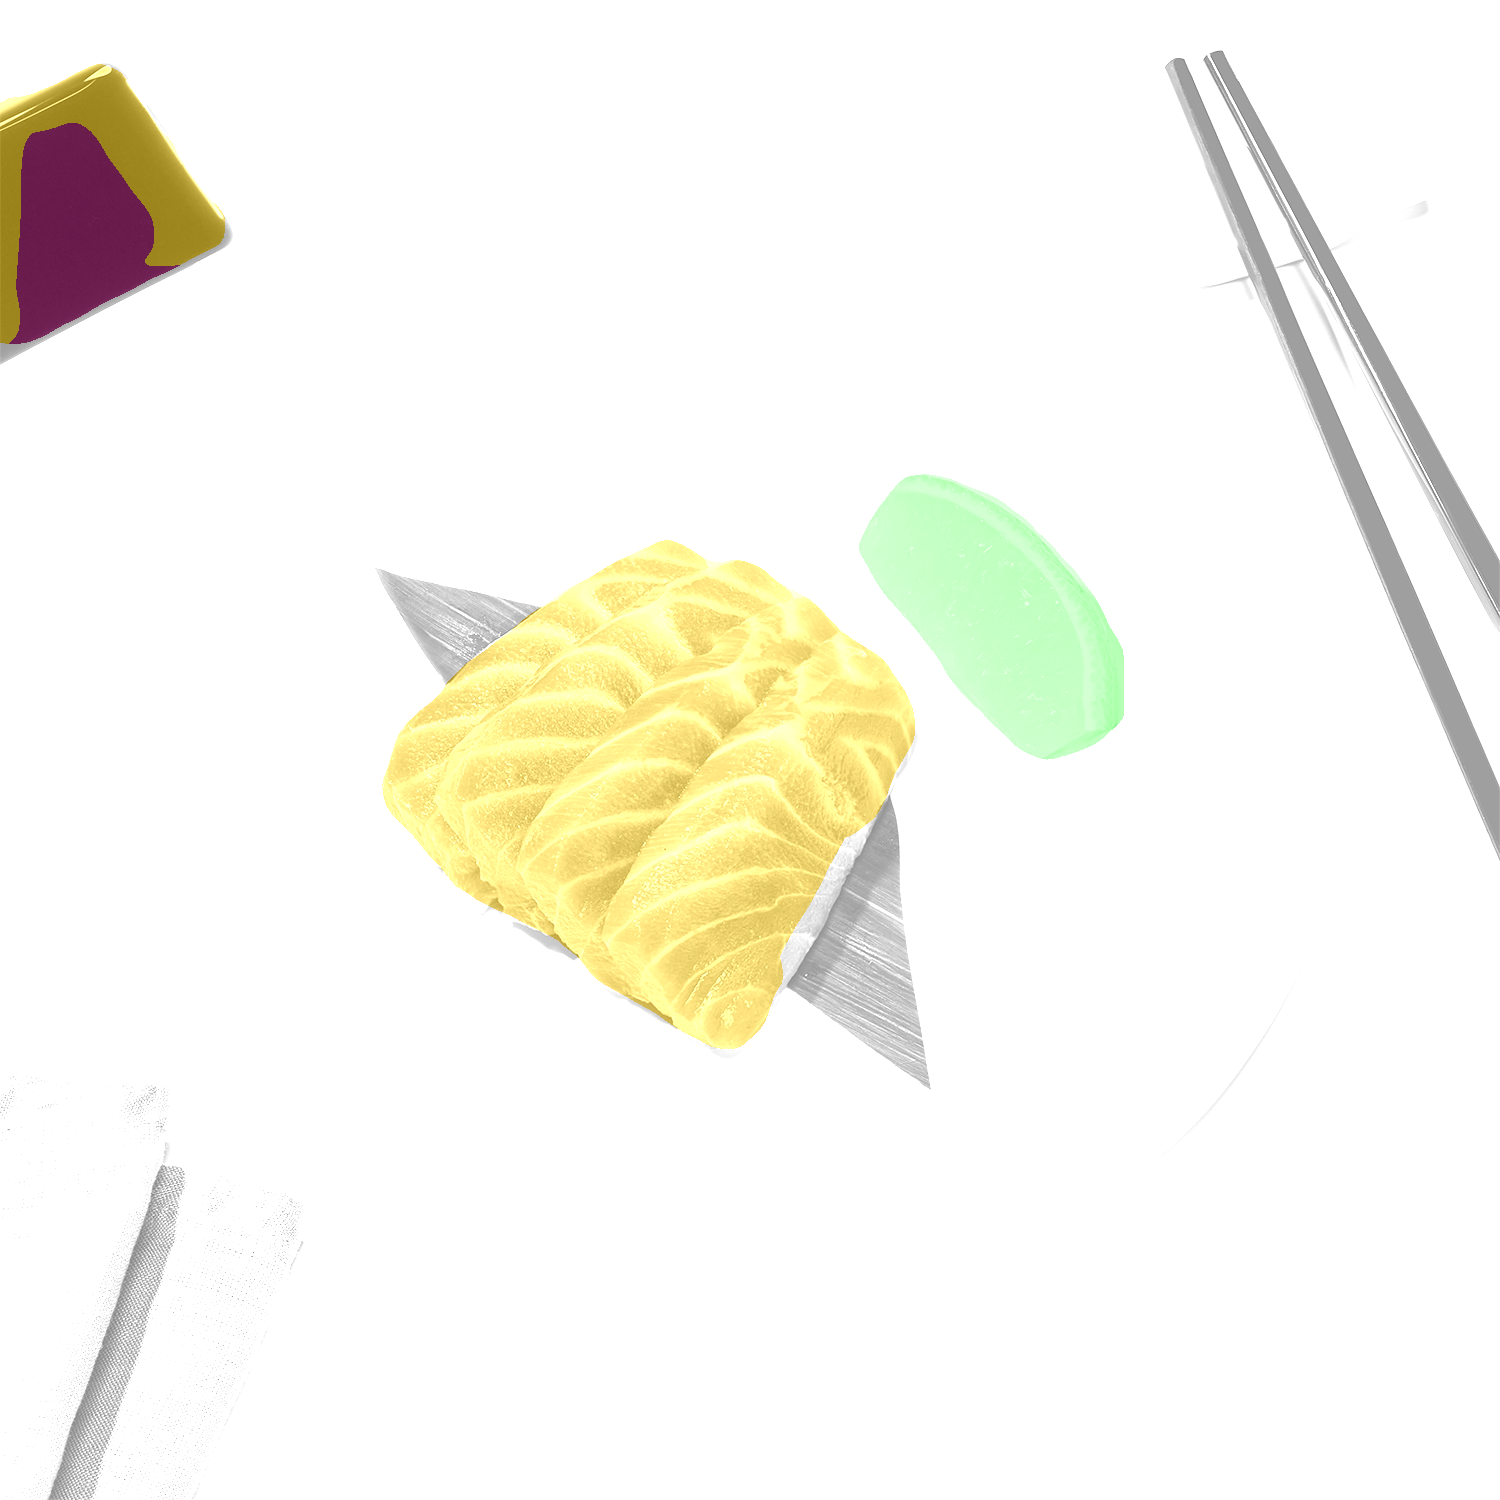

In [14]:
img

'https://dima.skynet.center/test_photos/b0319d42-2191-4b00-b1c8-feb09c82dc48.jpeg'